### Effect of Normalization, Standardization etc.
simulate:
- normal distribution
- random distribution
- left skewness, right skewness

In [1]:
import numpy as np
from sklearn.preprocessing import Normalizer, StandardScaler
from scipy.stats import percentileofscore

# generate random data set
np.random.seed(42)
X_random_dist = np.random.randint(0, 42, size=(3, 2))
X_normal_dist = np.random.normal(loc=0, scale=1, size=(3, 2))
X_left_skewed = np.random.lognormal(mean=0, sigma=1, size=(3, 2))

def transform_data(X):
    # normalize data set
    normalizer = Normalizer()
    X_normalized = normalizer.fit_transform(X)

    # standartize data set
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # estimate percentile column-wise
    X_percentiles = np.zeros_like(X, dtype=float)
    for col in range(X.shape[1]):
        X_percentiles[:, col] = [percentileofscore(X[:, col], value) for value in X[:, col]]
    
    return X, X_normalized, X_scaled, X_percentiles

random_dist = transform_data(X_random_dist)
normal_dist = transform_data(X_normal_dist)
left_skewed = transform_data(X_left_skewed)


In [2]:
X_random_dist

array([[38, 28],
       [14,  7],
       [20, 38]])

In [3]:
print('Initial: \n', random_dist[0])
print('Normalized: \n', random_dist[1])
print('Standardized: \n', random_dist[2])
print('Percentiles: \n', random_dist[3])

Initial: 
 [[38 28]
 [14  7]
 [20 38]]
Normalized: 
 [[0.80505584 0.59319904]
 [0.89442719 0.4472136 ]
 [0.46574643 0.88491822]]
Standardized: 
 [[ 1.37281295  0.28382962]
 [-0.98058068 -1.34174003]
 [-0.39223227  1.05791041]]
Percentiles: 
 [[100.          66.66666667]
 [ 33.33333333  33.33333333]
 [ 66.66666667 100.        ]]


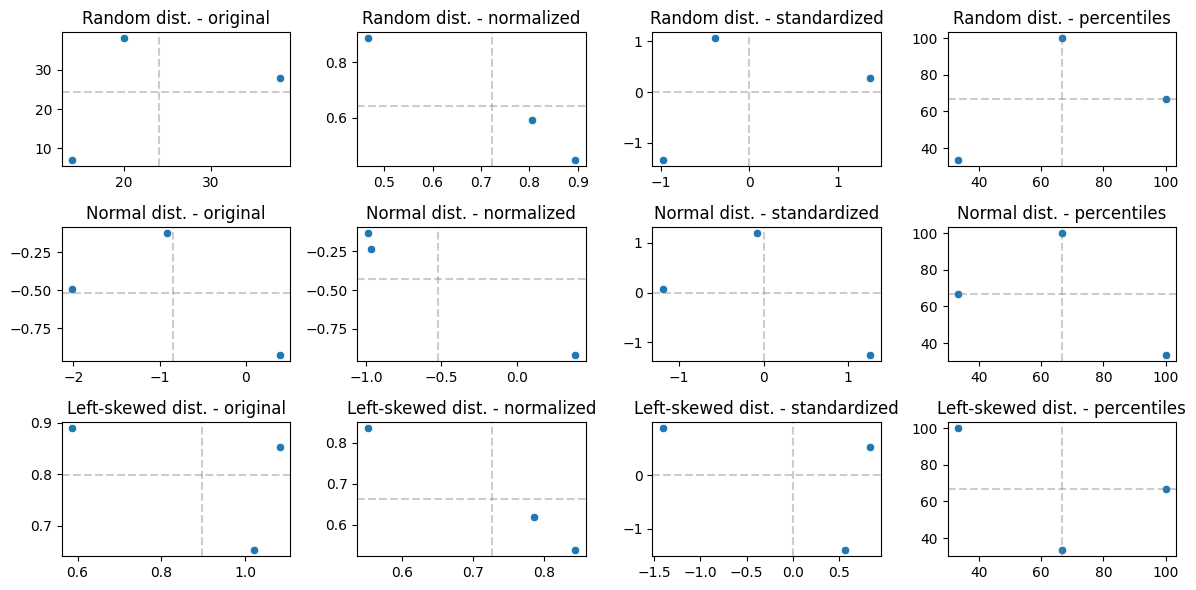

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

methods = ['original', 'normalized', 'standardized', 'percentiles']

fig, axes = plt.subplots(3, len(methods), figsize=(12, 6))

for index, (rd, nd, lf, method) in enumerate(zip(random_dist, normal_dist, left_skewed, methods)):
    # Scatter plot for random_dist
    sns.scatterplot(x=rd[:, 0], y=rd[:, 1], ax=axes[0, index])
    axes[0, index].set_title(f'Random dist. - {method}')
    axes[0, index].axhline(rd[:, 1].mean(), ls='--', c='grey', alpha=0.4)
    axes[0, index].axvline(rd[:, 0].mean(), ls='--', c='grey', alpha=0.4)
    
    # Scatter plot for normal_dist
    sns.scatterplot(x=nd[:, 0], y=nd[:, 1], ax=axes[1, index])
    axes[1, index].set_title(f'Normal dist. - {method}')
    axes[1, index].axhline(nd[:, 1].mean(), ls='--', c='grey', alpha=0.4)
    axes[1, index].axvline(nd[:, 0].mean(), ls='--', c='grey', alpha=0.4)

    # Scatter plot for normal_dist
    sns.scatterplot(x=lf[:, 0], y=lf[:, 1], ax=axes[2, index])
    axes[2, index].set_title(f'Left-skewed dist. - {method}')
    axes[2, index].axhline(lf[:, 1].mean(), ls='--', c='grey', alpha=0.4)
    axes[2, index].axvline(lf[:, 0].mean(), ls='--', c='grey', alpha=0.4)

    

plt.tight_layout()
plt.show()


### Behaviour of Cosine Similarity

In [5]:
import numpy as np
from numpy.linalg import norm
import pandas as pd

A = np.array([
    1,1,1,1,1
])

B = np.array([
    1,1,1,1,1
])

cosine = np.dot(A,B)/(norm(A)*norm(B))
print("Cosine Similarity:", cosine)

A = pd.DataFrame(
    {
        'A':A
    }
)

B = pd.DataFrame(
    {
        'B':B
    }
)

print("Cosine Similarity w/ pandas:", A.T.dot(B))


Cosine Similarity: 0.9999999999999998
Cosine Similarity w/ pandas:    B
A  5


## Composite Features

In [6]:
import pandas as pd

# Example data (you can replace with your actual player data)
data = {
    'Player': ['Player A', 'Player B', 'Player C'],
    'KP': [150, 25, 40],
    'PrgP': [150, 120, 180],
    'PPA': [20, 15, 25],
    '1/3': [60, 50, 70],
    'xA': [6, 4, 8],
    'PassLive': [80, 65, 100],
    'Tkl': [20, 18, 22],
    'TklW': [15, 12, 18],
    'Recov': [50, 45, 60],
    'Won%': [60, 55, 65],
    'Won': [40, 35, 45],
    'Cmp%': [85, 80, 90],
    'Succ%': [70, 65, 75],
    'Mis': [10, 15, 8],
    'Dis': [12, 10, 14],
    'Att': [100, 90, 110],
    'PrgC': [60, 55, 70],
    'CPA': [20, 15, 25],
    'Tkld%': [40, 35, 45],
    'SCA': [25, 20, 30],
    'GCA': [10, 8, 12],
    'Sh/90': [2.5, 2.0, 3.0],
    'SoT/90': [1.2, 1.0, 1.5]
}

df = pd.DataFrame(data)

# Calculating new features
df['vision'] = (df['KP'] + df['PrgP'] + df['PPA'] + df['1/3'] + df['xA'] + df['PassLive']) / 6
df['intensity'] = (df['Tkl'] + df['TklW'] + df['Recov']) / 3
df['physical'] = df['Won%'] * df['Won'] + df['Recov']
df['ball_control'] = (df['Cmp%'] + df['Succ%'] - df['Mis'] - df['Dis']) / 2
df['dribbling_efficiency'] = (df['Succ%'] * df['Att'] + df['PrgC'] + df['CPA'] - df['Tkld%']) / 4
df['attacking_involvement'] = (df['SCA'] + df['GCA'] + df['Sh/90'] + df['SoT/90']) / 4

print(df[['Player', 'vision', 'intensity', 'physical', 'ball_control', 'dribbling_efficiency', 'attacking_involvement']])


     Player     vision  intensity  physical  ball_control  \
0  Player A  77.666667  28.333333      2450          66.5   
1  Player B  46.500000  25.000000      1970          60.0   
2  Player C  70.500000  33.333333      2985          71.5   

   dribbling_efficiency  attacking_involvement  
0               1760.00                  9.675  
1               1471.25                  7.750  
2               2075.00                 11.625  


<Axes: xlabel='vision', ylabel='physical'>

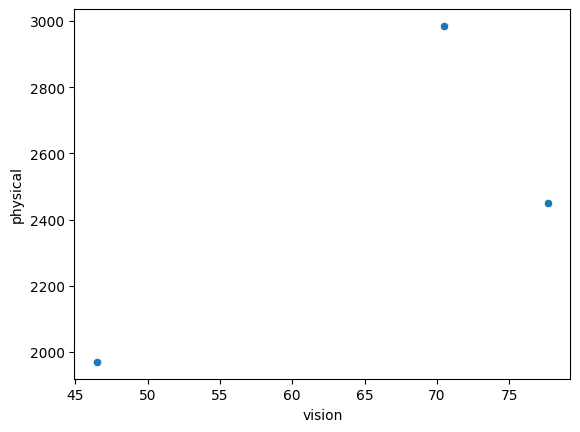

In [7]:
import seaborn as sns

sns.scatterplot(data=df,x= 'vision', y='physical')

# Item-User CF

Item-User CF
user: teams
item: players

We will implement Collaborative Filtering using a User-Item Matrix and Singular Value Decomposition (SVD) to generate recommendations for teams.
Ratings can be the average of the season generated by WhoScored.com

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds

# Assuming the sandbox data is already generated from the previous steps
# Let's start from the merged transfer data that combines teams, players, and transfers.

# Merged data (Transfers + Teams + Players) as generated in the previous step
merged_data = pd.DataFrame({
    'team_id': [8, 6, 7, 5, 2, 3, 1, 4, 9, 10],  # Example team IDs
    'player_id': [95, 82, 70, 51, 23, 14, 35, 42, 60, 12],  # Example player IDs
    'transfer_fee_million_euros': [17, 58, 46, 58, 37, 28, 50, 30, 60, 25],  # Transfer fees
    'transfer_year': [2018, 2022, 2023, 2019, 2020, 2019, 2021, 2022, 2020, 2023]
})

# Simulating ratings for players (ratings can be transfer fees or team satisfaction with transfers)
merged_data['rating'] = merged_data['transfer_fee_million_euros'] / 10  # Scaling transfer fee as a proxy for player quality

# Create a user-item (team-player) matrix
# Rows represent teams, columns represent players, and the values are the 'ratings' (transfer fees as proxies for interest)
user_item_matrix = merged_data.pivot(index='team_id', columns='player_id', values='rating').fillna(0)

print("User-Item Matrix (Team-Player Ratings):")
print(user_item_matrix)

# Convert the matrix into a NumPy array for further calculations
user_item_matrix_np = user_item_matrix.values

# Step 1: Perform Singular Value Decomposition (SVD)
# Decompose the matrix into 3 components: U, Sigma, and V transpose
U, sigma, Vt = svds(user_item_matrix_np, k=3)

# Convert Sigma into a diagonal matrix
sigma = np.diag(sigma)

# Step 2: Predict ratings by recombining the decomposed matrices
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Convert back to DataFrame for easier interpretation
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=user_item_matrix.columns, index=user_item_matrix.index)

#print("\nPredicted Ratings (after SVD):")
#print(predicted_ratings_df)

# Step 3: Make Player Recommendations for a Team
def recommend_players(team_id, original_ratings, predicted_ratings_df, num_recommendations=3):
    """
    Recommends top players for a given team based on predicted ratings.

    team_id: The team for which recommendations are to be made.
    original_ratings: The original user-item matrix with actual ratings.
    predicted_ratings_df: The predicted ratings matrix.
    num_recommendations: The number of recommendations to make.
    """
    team_row = predicted_ratings_df.loc[team_id].sort_values(ascending=False)
    # Filter out players the team has already signed
    players_already_signed = original_ratings.loc[team_id][original_ratings.loc[team_id] > 0].index.tolist()
    
    recommended_players = team_row[~team_row.index.isin(players_already_signed)].head(num_recommendations)
    
    return recommended_players

# Example: Recommend 3 players for Team 2 (team_id = 2)
team_id = 1
recommendations = recommend_players(team_id, user_item_matrix, predicted_ratings_df, num_recommendations=3)

print(f"\nTop Player Recommendations for Team {team_id}:")
print(recommendations)


User-Item Matrix (Team-Player Ratings):
player_id   12   14   23   35   42   51   60   70   82   95
team_id                                                    
1          0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0
2          0.0  0.0  3.7  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3          0.0  2.8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4          0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0
5          0.0  0.0  0.0  0.0  0.0  5.8  0.0  0.0  0.0  0.0
6          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.8  0.0
7          0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.6  0.0  0.0
8          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.7
9          0.0  0.0  0.0  0.0  0.0  0.0  6.0  0.0  0.0  0.0
10         2.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

Top Player Recommendations for Team 1:
player_id
14    3.307153e-32
70    3.117103e-32
12    2.496054e-33
Name: 1, dtype: float64


# Content-based Recomennder System

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Assume we have team and player data
# Teams Data
teams = pd.DataFrame({
    'team_id': [1, 2, 3, 4, 5],
    'team_name': ['Team A', 'Team B', 'Team C', 'Team D', 'Team E'],
    'playstyle': ['Possession', 'Counter-Attack', 'Pressing', 'Possession', 'Balanced'],
    'budget_million_euros': [150, 80, 120, 200, 100],
    'desired_position': ['Midfielder', 'Striker', 'Defender', 'Striker', 'Goalkeeper']  # Team preference for position
})

# Players Data
players = pd.DataFrame({
    'player_id': [101, 102, 103, 104, 105, 106],
    'player_name': ['Player X', 'Player Y', 'Player Z', 'Player W', 'Player V', 'Player U'],
    'position': ['Midfielder', 'Striker', 'Defender', 'Striker', 'Goalkeeper', 'Midfielder'],
    'passing_accuracy': [85, 70, 60, 75, 65, 90],  # Performance metrics
    'goals_scored': [10, 25, 2, 30, 0, 12],
    'tackles_made': [55, 20, 90, 15, 10, 40],
    'market_value_million_euros': [60, 120, 45, 150, 30, 50]
})

# Step 2: Feature Engineering
# Create a numerical representation of playstyle using one-hot encoding
teams = pd.get_dummies(teams, columns=['playstyle'])
players = pd.get_dummies(players, columns=['position'])

# Step 3: Normalize numerical features (budget, passing accuracy, goals, tackles, etc.)
scaler = MinMaxScaler()

teams[['budget_million_euros']] = scaler.fit_transform(teams[['budget_million_euros']])
players[['passing_accuracy', 'goals_scored', 'tackles_made', 'market_value_million_euros']] = scaler.fit_transform(
    players[['passing_accuracy', 'goals_scored', 'tackles_made', 'market_value_million_euros']]
)

print("Teams Data after feature engineering and normalization:")
#print(teams)

print("\nPlayers Data after feature engineering and normalization:")
#print(players)

# Step 4: Build Content-Based Recommender System
# Define a function to get the features of a team (including its preferences) and compare with players

def get_team_vector(team_row):
    # This will return a vector for a team combining its playstyle and budget
    team_vector = np.concatenate([
        team_row[['budget_million_euros']].values.flatten(),  # Team budget
        team_row[team_row.index.str.startswith('playstyle')].values.flatten(),  # Team playstyle
    ])
    return team_vector

def get_player_vector(player_row):
    # This will return a vector for a player combining performance metrics and position
    player_vector = np.concatenate([
        player_row[['passing_accuracy', 'goals_scored', 'tackles_made', 'market_value_million_euros']].values.flatten(),
        player_row[player_row.index.str.startswith('position')].values.flatten(),  # Player position
    ])
    return player_vector

# Create similarity calculation between a team's needs and a player's profile
def recommend_players_for_team(team_id, num_recommendations=3):
    # Get the team row
    team_row = teams[teams['team_id'] == team_id].iloc[0]
    team_vector = get_team_vector(team_row)
    
    # Calculate similarity with each player
    player_vectors = players.apply(get_player_vector, axis=1)
    player_vectors = np.array(list(player_vectors))
    
    team_vector = team_vector.reshape(1, -1)  # Reshape for similarity calculation
    
    # Calculate cosine similarity
    similarities = cosine_similarity(team_vector, player_vectors)[0]
    
    # Sort players by similarity score
    players['similarity'] = similarities
    recommended_players = players.sort_values(by='similarity', ascending=False).head(num_recommendations)
    
    return recommended_players[['player_name', 'similarity']]

get_team_vector(teams[teams['team_id'] == 2].iloc[0])


Teams Data after feature engineering and normalization:

Players Data after feature engineering and normalization:


array([0.0, False, True, False, False], dtype=object)

## Object Orientation

In [10]:
class Person:
    
    def __init__(self, name):
        self.name = name
    
    def get_name(self):
        return self.name




p_name = Person('Alex').get_name()
print(p_name)

Alex
